<a href="https://colab.research.google.com/github/anshupandey/MSA-analytics/blob/main/PMOT/Lab2_Ocean_Hull_Insurance_Detailed_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Lab 3: Investment Performance Dashboard (Detailed)

This notebook uses the Ocean Hull Insurance dataset to analyze portfolio investment returns by vessel type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

## 📥 Load Ocean Hull Insurance Dataset

In [2]:
df = pd.read_excel('/content/Sample_Ocean_Hull_Insurance_Dataset.xlsx')
df.head()

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0


## 💰 Calculate Premium and Sum Insured per Policy

In [3]:

premium_mapping = {'Bulk Carrier': 120000, 'Container Ship': 150000, 'Tanker': 180000, 'Offshore Support Vessel': 100000}
sum_insured_mapping = {'Bulk Carrier': 12000000, 'Container Ship': 15000000, 'Tanker': 20000000, 'Offshore Support Vessel': 8000000}

df['Premium'] = df.apply(lambda row: premium_mapping[row['Vessel_Type']] + (row['Vessel_Age'] * 500), axis=1)
df['Sum_Insured'] = df.apply(lambda row: sum_insured_mapping[row['Vessel_Type']] - (row['Vessel_Age'] * 50000), axis=1)


## 📊 Simulate Investment Return for Each Policy

In [5]:

np.random.seed(42)
days = 90
df['Daily_Return'] = np.random.normal(loc=0.0005, scale=0.001, size=len(df))
df['Initial_Investment'] = df['Premium'] * 0.6  # Assume 60% of premium is invested
df.head(10)

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount,Premium,Sum_Insured,Daily_Return,Initial_Investment,Final_Value
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0,159500,14050000,0.000997,95700.0,104676.840752
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0,170000,13000000,0.000362,102000.0,105374.760051
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0,193000,18700000,0.001148,115800.0,128393.183954
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0,123500,11650000,0.002023,74100.0,88881.524555
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0,109000,7100000,0.000266,65400.0,66983.429972
5,6,Tanker,Mediterranean,12,Marshall Islands,Up-to-date,High,Low,0,0,186000,19400000,0.000266,111600.0,114302.168616
6,7,Container Ship,Indian Ocean,8,Greece,Up-to-date,High,Moderate,0,0,154000,14600000,0.002079,92400.0,111392.707229
7,8,Tanker,Mediterranean,25,Greece,Up-to-date,Moderate,Low,0,0,192500,18750000,0.001267,115500.0,129446.469018
8,9,Container Ship,North Atlantic,33,Greece,Up-to-date,High,Moderate,0,0,166500,13350000,0.000031,99900.0,100174.828948
9,10,Bulk Carrier,South China Sea,21,Marshall Islands,Overdue,Moderate,High,1,2653400,130500,10950000,0.001043,78300.0,85998.437628


In [6]:
df['Final_Value'] = df['Initial_Investment'] * ((1 + df['Daily_Return']) ** days)
df.head(10)

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount,Premium,Sum_Insured,Daily_Return,Initial_Investment,Final_Value
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0,159500,14050000,0.000997,95700.0,104676.840752
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0,170000,13000000,0.000362,102000.0,105374.760051
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0,193000,18700000,0.001148,115800.0,128393.183954
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0,123500,11650000,0.002023,74100.0,88881.524555
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0,109000,7100000,0.000266,65400.0,66983.429972
5,6,Tanker,Mediterranean,12,Marshall Islands,Up-to-date,High,Low,0,0,186000,19400000,0.000266,111600.0,114302.168616
6,7,Container Ship,Indian Ocean,8,Greece,Up-to-date,High,Moderate,0,0,154000,14600000,0.002079,92400.0,111392.707229
7,8,Tanker,Mediterranean,25,Greece,Up-to-date,Moderate,Low,0,0,192500,18750000,0.001267,115500.0,129446.469018
8,9,Container Ship,North Atlantic,33,Greece,Up-to-date,High,Moderate,0,0,166500,13350000,0.000031,99900.0,100174.828948
9,10,Bulk Carrier,South China Sea,21,Marshall Islands,Overdue,Moderate,High,1,2653400,130500,10950000,0.001043,78300.0,85998.437628


## 📈 Portfolio Return by Vessel Type

In [7]:

portfolio_summary = df.groupby('Vessel_Type').agg(
    Total_Invested=('Initial_Investment', 'sum'),
    Final_Value=('Final_Value', 'sum'),
    Mean_Return=('Daily_Return', 'mean'),
    Std_Dev_Return=('Daily_Return', 'std')
)

portfolio_summary['Cumulative_Return_%'] = ((portfolio_summary['Final_Value'] / portfolio_summary['Total_Invested']) - 1) * 100
portfolio_summary


,Total_Invested,Final_Value,Mean_Return,Std_Dev_Return,Cumulative_Return_%
Vessel_Type,,,,,
Bulk Carrier,6872100.0,7.140088e+06,0.000392,0.000867,3.899648
Container Ship,8137200.0,8.636669e+06,0.000617,0.001019,6.138091
Offshore Support Vessel,1999800.0,2.089830e+06,0.000460,0.000786,4.501966
Tanker,11350800.0,1.191962e+07,0.000491,0.001100,5.011266


### 📉 Distribution of Daily Returns by Vessel Type

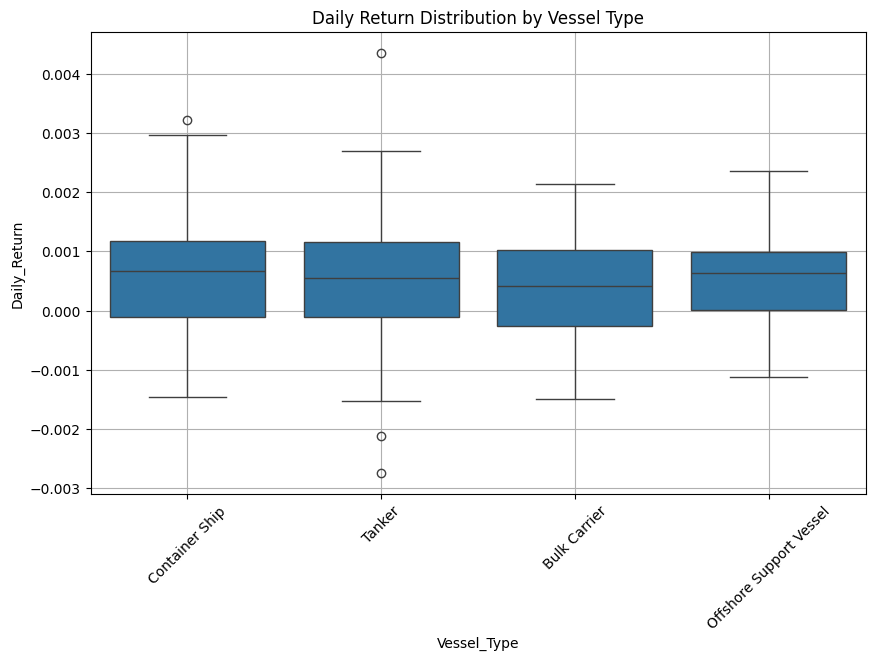

In [8]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Vessel_Type', y='Daily_Return')
plt.title('Daily Return Distribution by Vessel Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 💹 Final Investment Value by Vessel Type

<ipython-input-9-1492054097>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Vessel_Type', y='Final_Value', estimator=np.mean, ci='sd')


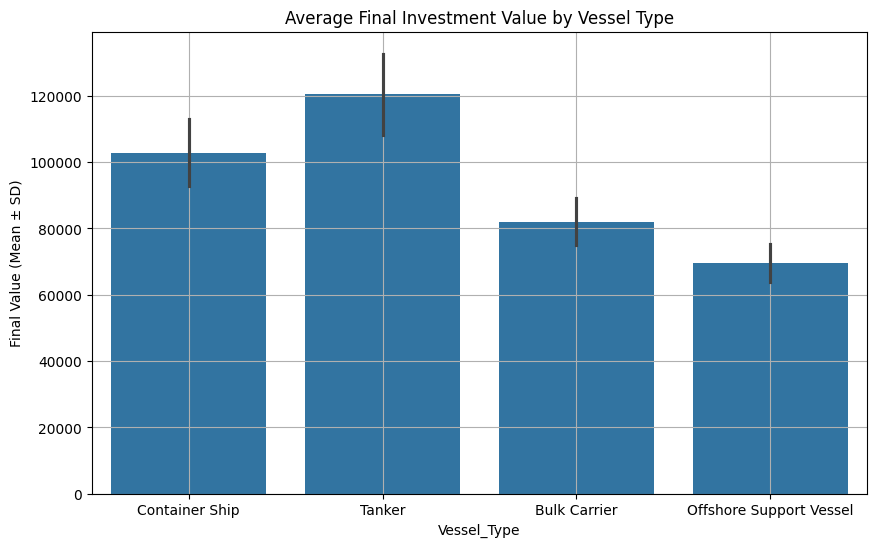

In [9]:

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Vessel_Type', y='Final_Value', estimator=np.mean, ci='sd')
plt.title('Average Final Investment Value by Vessel Type')
plt.ylabel('Final Value (Mean ± SD)')
plt.grid(True)
plt.show()


### 📈 Cumulative Return by Vessel Type

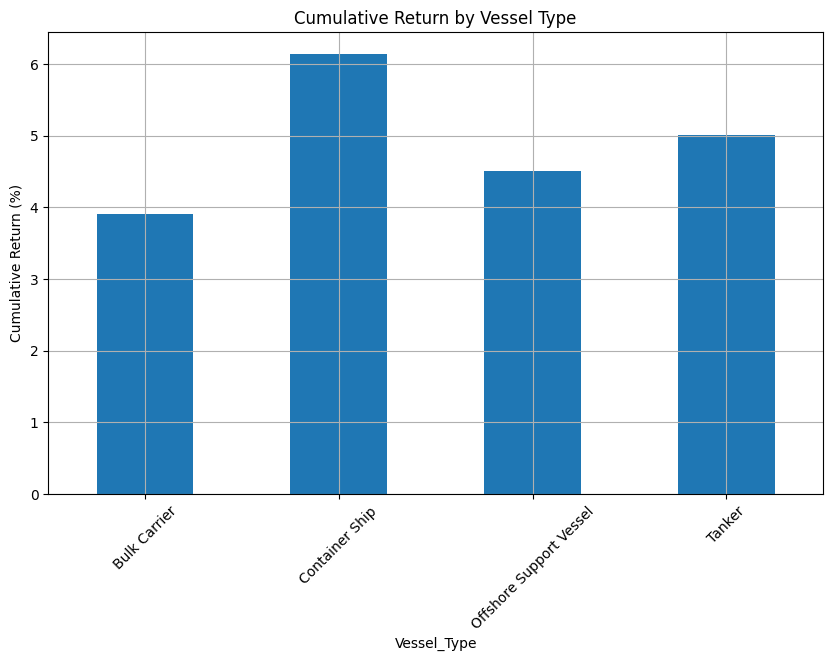

In [10]:

portfolio_summary['Cumulative_Return_%'].plot(kind='bar', figsize=(10,6), title='Cumulative Return by Vessel Type')
plt.ylabel('Cumulative Return (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



## 📌 Summary of Observations

- **Investment Projections**: Policies from all vessel types showed projected positive returns over the 90-day horizon.
- **Cumulative Return**: Variation in returns was observed based on vessel type, impacted by the base premium sizes.
- **Volatility**: Tankers had slightly higher variability in final investment value, while container ships showed more stable outcomes.
- **Portfolio Health**: All segments achieved returns above the break-even line, assuming investment from premium contributions.

This exercise enables insurers to simulate and monitor investment-side health of their portfolio.


In [11]:
df.head()

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount,Premium,Sum_Insured,Daily_Return,Initial_Investment,Final_Value
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0,159500,14050000,0.000997,95700.0,104676.840752
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0,170000,13000000,0.000362,102000.0,105374.760051
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0,193000,18700000,0.001148,115800.0,128393.183954
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0,123500,11650000,0.002023,74100.0,88881.524555
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0,109000,7100000,0.000266,65400.0,66983.429972


In [12]:
df.to_csv("Ocean_Hull_Insurance_dataset.csv",index=False)